 Liron firuz 315794057

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv'
Data = pd.read_csv(url)

Q1: video with highist views number: 149376127. 
Its name:The Shape of 2017.
Its publish time is: december 6 2017.


In [3]:
Data['views'].max()

149376127

In [4]:
Data[Data.loc[:,'views']==149376127].title

6181    YouTube Rewind: The Shape of 2017 | #YouTubeRe...
Name: title, dtype: object

In [5]:
Data[Data.loc[:,'views']==149376127].publish_time

6181    2017-12-06T17:58:51.000Z
Name: publish_time, dtype: object

Q2

In [6]:
top_channel=Data[['channel_title','views']]
top_3_channel=top_channel.sort_values('views',ascending = False)
top_3_channel.head(3)

,channel_title,views
6181,YouTube Spotlight,149376127
5935,YouTube Spotlight,137843120
5699,YouTube Spotlight,125432237


Q3

In [7]:
reaction_to_video=Data[['likes','dislikes','views','comment_count']]
reaction_to_video.corr(method='spearman')

,likes,dislikes,views,comment_count
likes,1.000000,0.801154,0.877789,0.881849
dislikes,0.801154,1.000000,0.866979,0.843331
views,0.877789,0.866979,1.000000,0.840532
comment_count,0.881849,0.843331,0.840532,1.000000


Q4

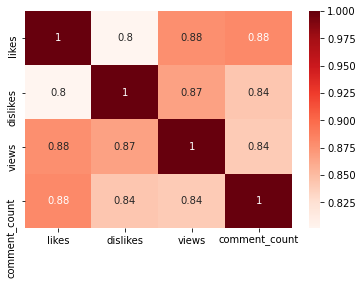

In [8]:
correlation_matrix=reaction_to_video.corr(method='spearman')
sns.heatmap(data=correlation_matrix,cmap='Reds', annot=True)

Q5: strongest correlation is 0.88 (likes & views, and also likes & Comment count)

In [9]:
correlation_matrix = correlation_matrix.replace(1,0)
correlation_matrix.max()

likes            0.881849
dislikes         0.866979
views            0.877789
comment_count    0.881849
dtype: float64

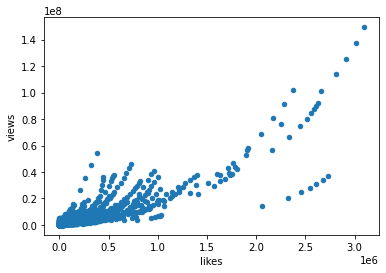

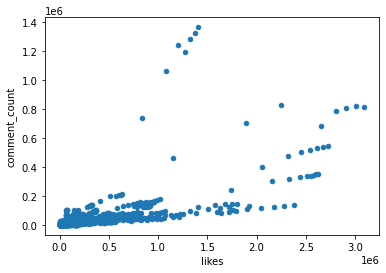

In [13]:
reaction_to_video.plot.scatter(x = 'likes', y = 'views')
reaction_to_video.plot.scatter(x = 'likes', y = 'comment_count')

Q6

In [11]:
Data_c=Data.copy(deep=False)
Data_c['publish_time'] = pd.to_datetime(Data_c.publish_time)
Data_c['year'] = pd.DatetimeIndex(Data_c.publish_time).year
cut_data=Data_c[['year','views','category_id']]
data_for_pivot=cut_data[cut_data.loc[:,'year']>=2017]
data_for_pivot.pivot_table(['views'], index='year', columns='category_id')

views                                              \
category_id            1              2             10             15   
year                                                                    
2017         1.523700e+06  673961.717949  2.699066e+06  616435.598291   
2018         1.116844e+06  268244.866667  2.936402e+06  517924.841270   

                                                                        \
category_id             17             19            20             22   
year                                                                     
2017         764014.400802  430884.428571  6.066798e+05  816076.476744   
2018         570928.972222  261498.344828  1.683533e+06  399114.317647   

                                                                       \
category_id            23            24             25             26   
year                                                                    
2017         1.139901e+06  1.619840e+06  299529.406607  816109.490296   
2018         1.126556e+06  1.217611e+06  237351.269608  430092.593301   

                                                                        
category_id             27             28            29             43  
year                                                                    
2017         538659.191489  847030.296108  11013.928571  159222.363636  
2018         397855.081301  581375.204082  25463.555556            NaN